<div style="text-align: center; font-size: 30px;"><u><b><span style="font-weight: bold;">Zomato Restaurants Rating</span></b></u></div>

<img src="zomato.jpg" alt="Zomato restaurant rating" width="800" height="600">

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,LogisticRegression
from sklearn.ensemble import RandomForestRegressor

# Loading Dataset

In [2]:
df=pd.read_csv("zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Exploratory Data Analysis (EDA)

In [3]:
# shape of data
df.shape

(51717, 17)

- Dataset have 41373 rows and 17 columns

Dropped irrelevant Columns

In [4]:
del df['url']
del df['address']
del df['phone']
del df['reviews_list']
del df['menu_item']
del df['name']
df.head()

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [5]:
#columns in datasset
df.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'location', 'rest_type',
       'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

# Remove Duplicates value

In [6]:
df.duplicated().sum()

371

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

- So there are no Duplicate values now

In [9]:
df.shape

(51346, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51346 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   online_order                 51346 non-null  object
 1   book_table                   51346 non-null  object
 2   rate                         43826 non-null  object
 3   votes                        51346 non-null  int64 
 4   location                     51327 non-null  object
 5   rest_type                    51121 non-null  object
 6   dish_liked                   23595 non-null  object
 7   cuisines                     51303 non-null  object
 8   approx_cost(for two people)  51005 non-null  object
 9   listed_in(type)              51346 non-null  object
 10  listed_in(city)              51346 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.7+ MB


In [11]:
df['votes']=df['votes'].astype('int32')

# checking for null values and incorrect dtypes and resolve them

In [12]:
df.isna().sum()

online_order                       0
book_table                         0
rate                            7520
votes                              0
location                          19
rest_type                        225
dish_liked                     27751
cuisines                          43
approx_cost(for two people)      341
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

- So we have lots of null values we have to remove those

In [13]:
#unique rating in rates columns
df['dish_liked'].unique()

array(['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
       'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
       'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
       ...,
       'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian',
       'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani',
       'Biryani, Andhra Meal'], dtype=object)

In [14]:
df.dropna(subset=['rate','rest_type'],inplace=True)

In [15]:
df = df[df['rate'] != 'NEW']

In [16]:
df['rate'] = df['rate'].str.replace('/5', '')

In [76]:
df['rate'] = df['rate'].astype('float')

In [17]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(",", "")

In [18]:
df.dropna(subset=['approx_cost(for two people)'],inplace=True)

In [20]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype('int32')

In [21]:
df=df[df.cuisines.isna()==False]

In [22]:
df=df[df.dish_liked .isna()==False]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23218 entries, 0 to 51715
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   online_order                 23218 non-null  object
 1   book_table                   23218 non-null  object
 2   rate                         23218 non-null  object
 3   votes                        23218 non-null  int32 
 4   location                     23218 non-null  object
 5   rest_type                    23218 non-null  object
 6   dish_liked                   23218 non-null  object
 7   cuisines                     23218 non-null  object
 8   approx_cost(for two people)  23218 non-null  int32 
 9   listed_in(type)              23218 non-null  object
 10  listed_in(city)              23218 non-null  object
dtypes: int32(2), object(9)
memory usage: 1.9+ MB


In [24]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Jayanagar', 'Kumaraswamy Layout',
       'Rajarajeshwari Nagar', 'Mysore Road', 'Uttarahalli',
       'South Bangalore', 'Vijay Nagar', 'Bannerghatta Road', 'JP Nagar',
       'BTM', 'Wilson Garden', 'Koramangala 5th Block', 'Shanti Nagar',
       'Richmond Road', 'City Market', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'HSR', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'East Bangalore', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road', 'Domlur',
       'Koramangala 8th Block', 'Frazer Town', 'Ejipura', 'Vasanth Nagar',
       'Jeevan Bhima Nagar', 'Old Madras Road', 'Commercial Street',
       'Koramangala 6th Block', 'Majestic', 'Langford Town',
       'Koramangala 7th Block', 'Brookefield', 'Whitefield',
       'ITPL Main Road, Whitefield', 'Varthur Main Road, Whi

In [25]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

- As you see 'Location' columns has more sublocations and 'city' columns have a better Locations so we drop 'Location' column

In [26]:
del df['location']

# Rename the columns

In [27]:
df=df.rename(columns={"approx_cost(for two people)" : "avg_cost",
                      "listed_in(type)" : "meal_type", 
                      "listed_in(city)" : "city"})
df.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,avg_cost,meal_type,city
0,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [28]:
df['avg_cost'] = df['avg_cost'].astype('int32')

# Data Visualization

## Restaurants Delivering Online or Not

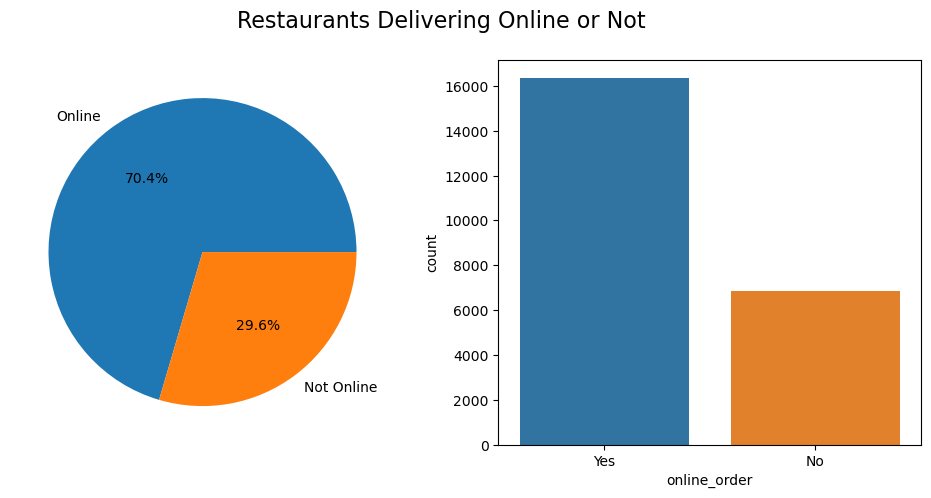

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot the pie chart on the left subplot
delivering_online_counts = df['online_order'].value_counts()
axs[0].pie(delivering_online_counts, labels=['Online', 'Not Online'], autopct='%1.1f%%')

# Plot the countplot on the right subplot
sns.countplot(data=df, x='online_order', ax=axs[1])

# Set a common title for both subplots
fig.suptitle("Restaurants Delivering Online or Not", fontsize=16)

# Display the subplots
plt.show()


## Restaurants Allowing Table Booking or Not

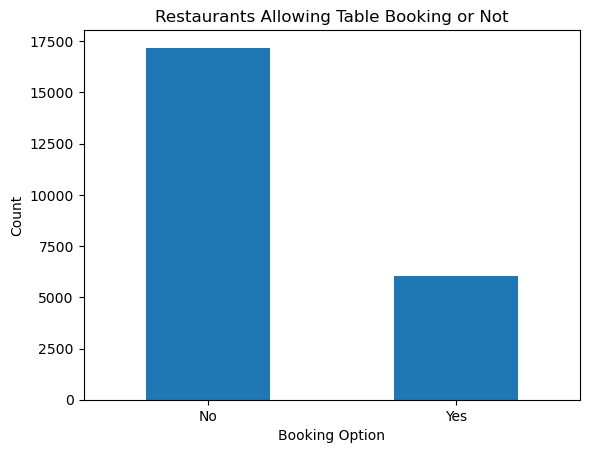

In [61]:
# 2. Restaurants Allowing Table Booking or Not (Bar Chart)
table_booking_counts = df['book_table'].value_counts()
table_booking_counts.plot(kind='bar')
plt.xlabel('Booking Option')
plt.ylabel('Count')
plt.title('Restaurants Allowing Table Booking or Not')
plt.xticks(rotation=0)
plt.show()

## Best Location

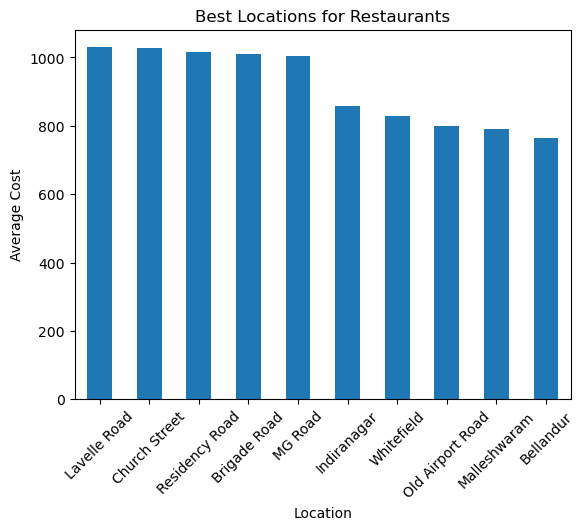

In [67]:
# 4. Best Location (Bar Chart)
best_location = df.groupby('city')['avg_cost'].mean().sort_values(ascending=False).head(10)
best_location.plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Average Cost')
plt.title('Best Locations for Restaurants')
plt.xticks(rotation=45)
plt.show()


## Number of restaurants with meal type

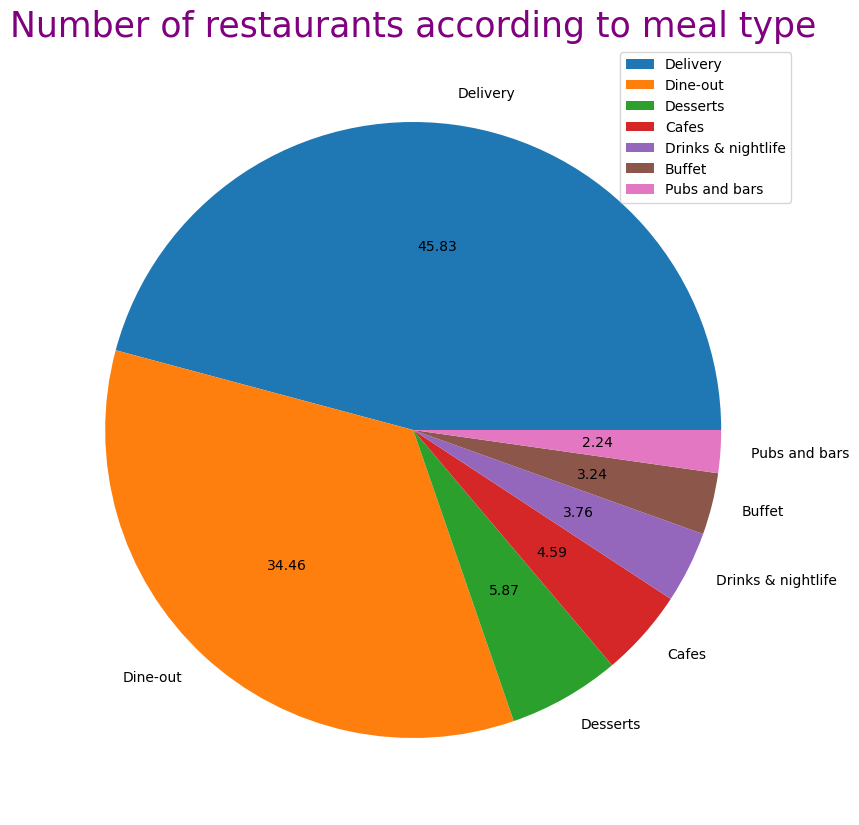

In [39]:
plt.figure(figsize=(10,10))
ax =df.meal_type.value_counts()
labels=df['meal_type'].value_counts().index
plt.pie(ax,labels=labels,autopct='%.2f')
plt.title("Number of restaurants according to meal type",fontsize=25,color='purple')
plt.legend()
plt.show()

## Number of restaurants in each area of banglore

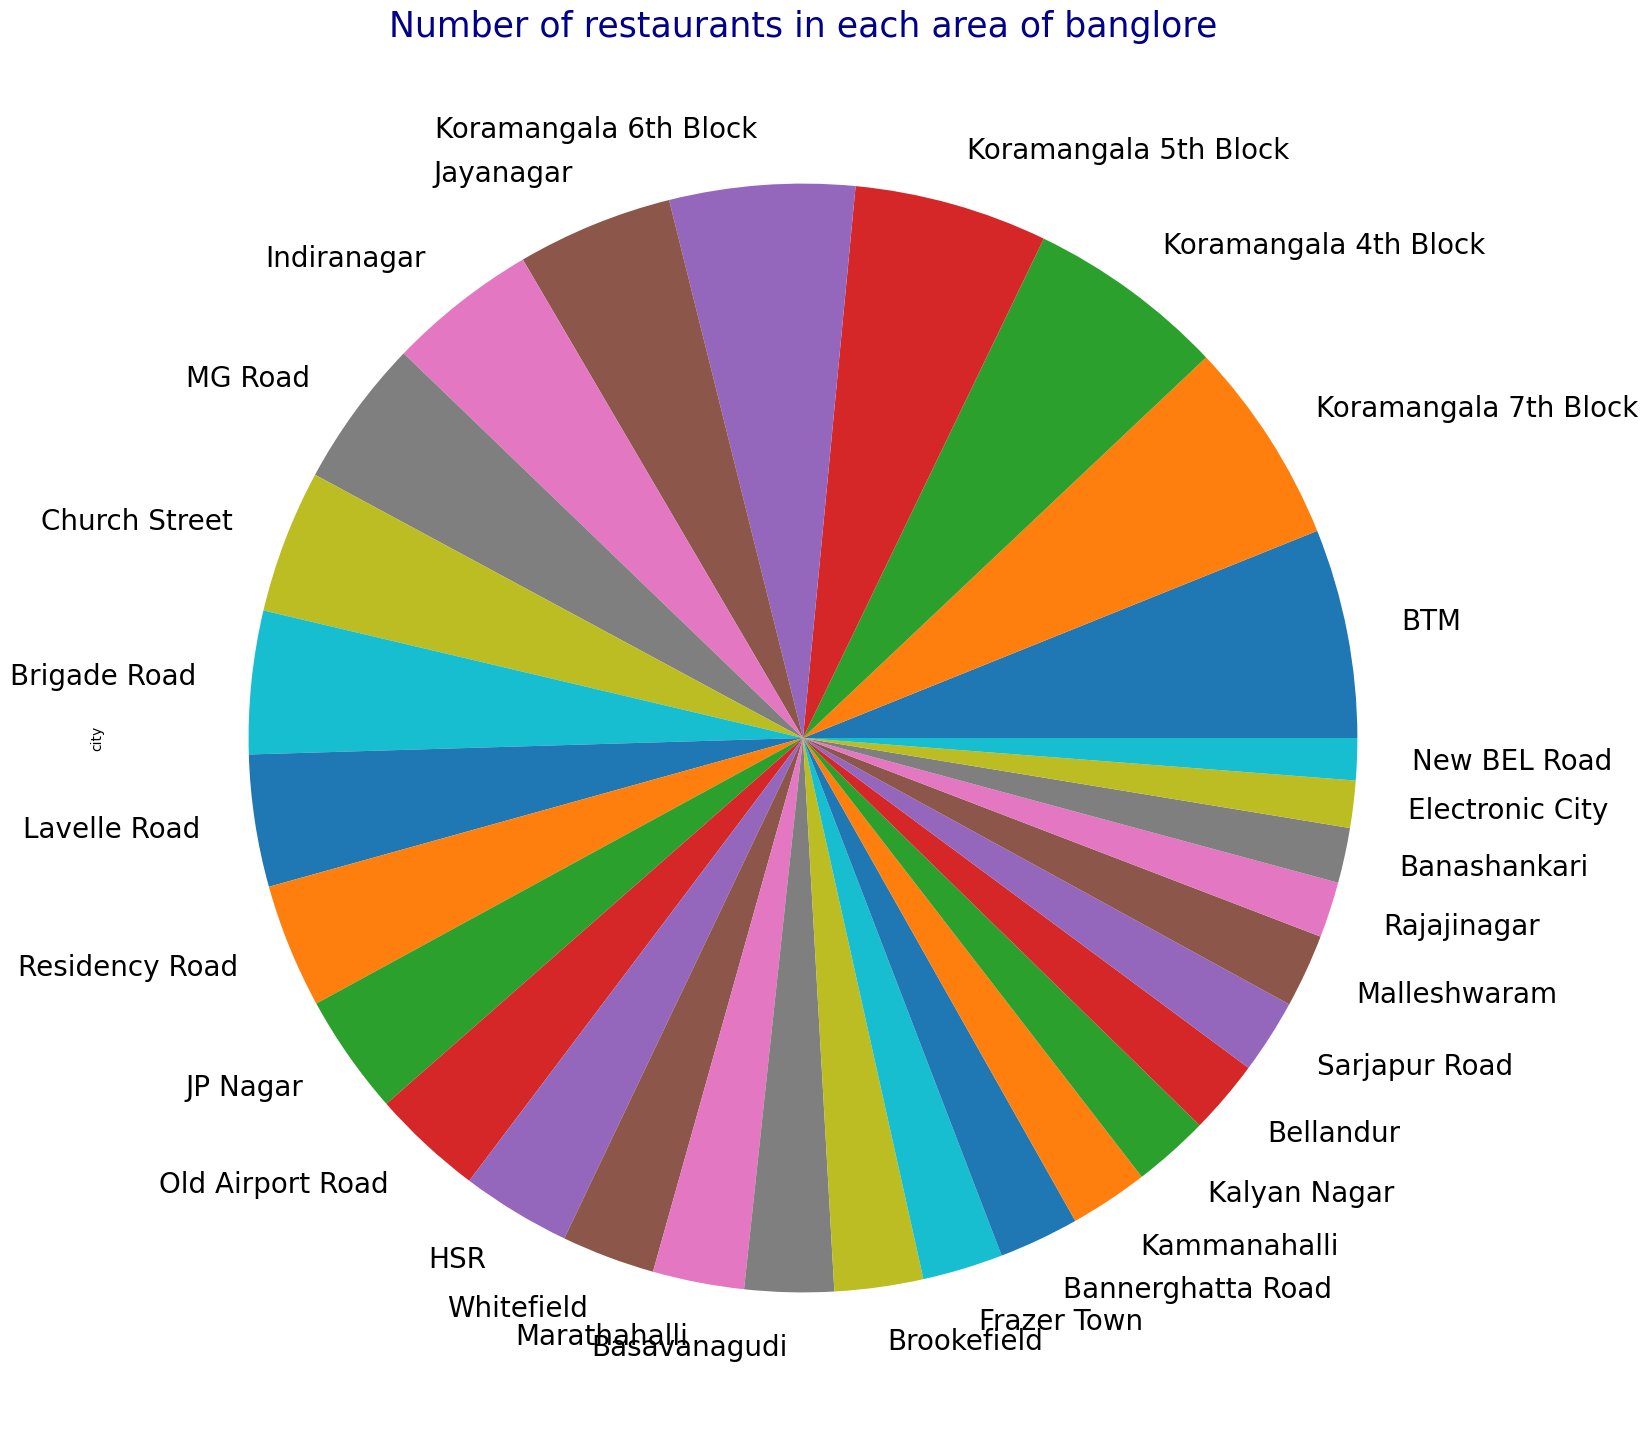

In [68]:
plt.figure(figsize=(18,18))

ax=df.city.value_counts()
ax.plot(kind='pie',fontsize=20)

plt.title('Number of restaurants in each area of banglore',fontsize=25,color='darkblue')
plt.show()

 - BTM location have most of restaurants

## Relation between Location and Rating

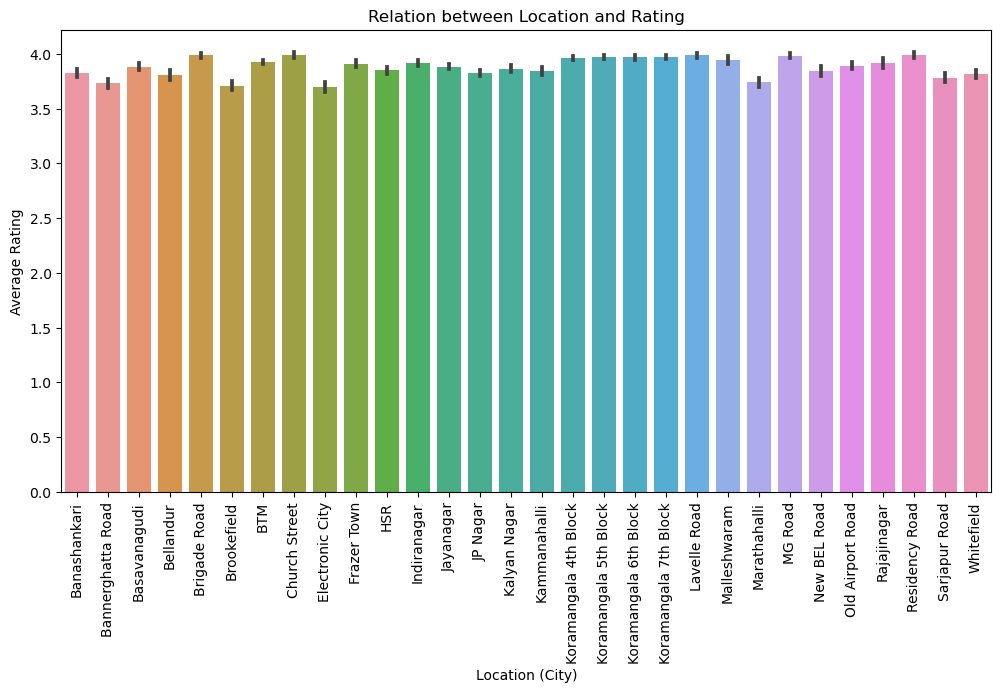

In [75]:
# Assuming 'rate' is already in float format
plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='rate', data=df)
plt.xticks(rotation=90)
plt.title('Relation between Location and Rating')
plt.xlabel('Location (City)')
plt.ylabel('Average Rating')
plt.show()


## Type of Restaurant in City

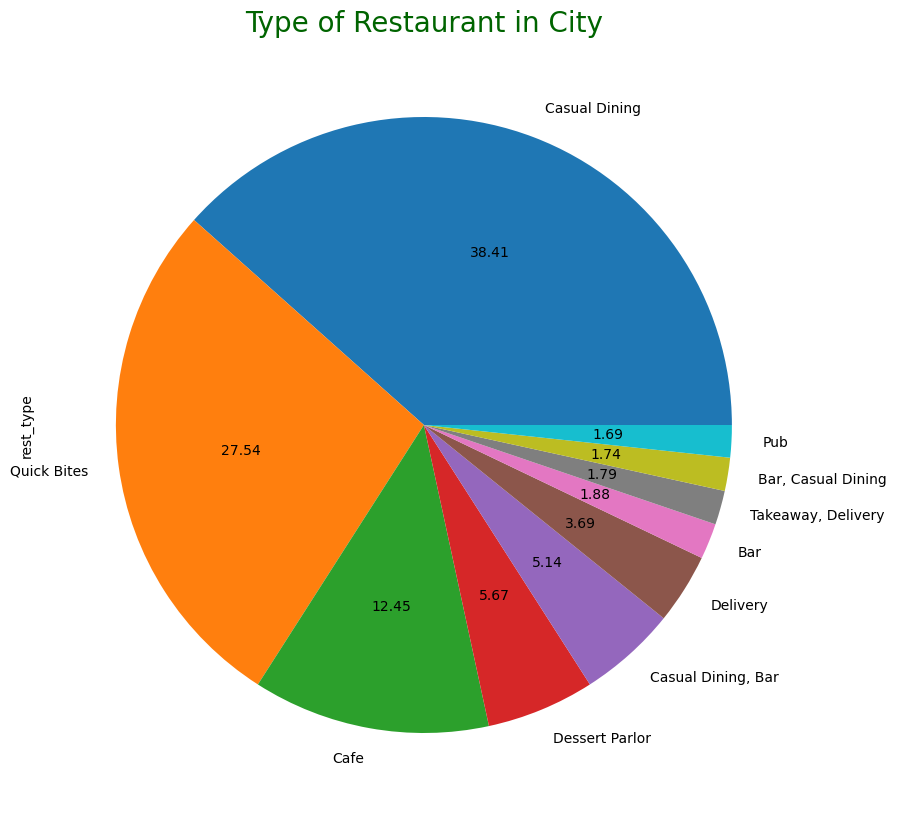

In [78]:
plt.figure(figsize=(10,10))

ax=df.rest_type.value_counts()[:10]
label=df['rest_type'].value_counts()[:10].index
ax.plot(kind='pie',labels=label,autopct='%.2f')

plt.title("Type of Restaurant in City",fontsize=20,color='darkgreen')
plt.show()

## Restaurant Type and Rating

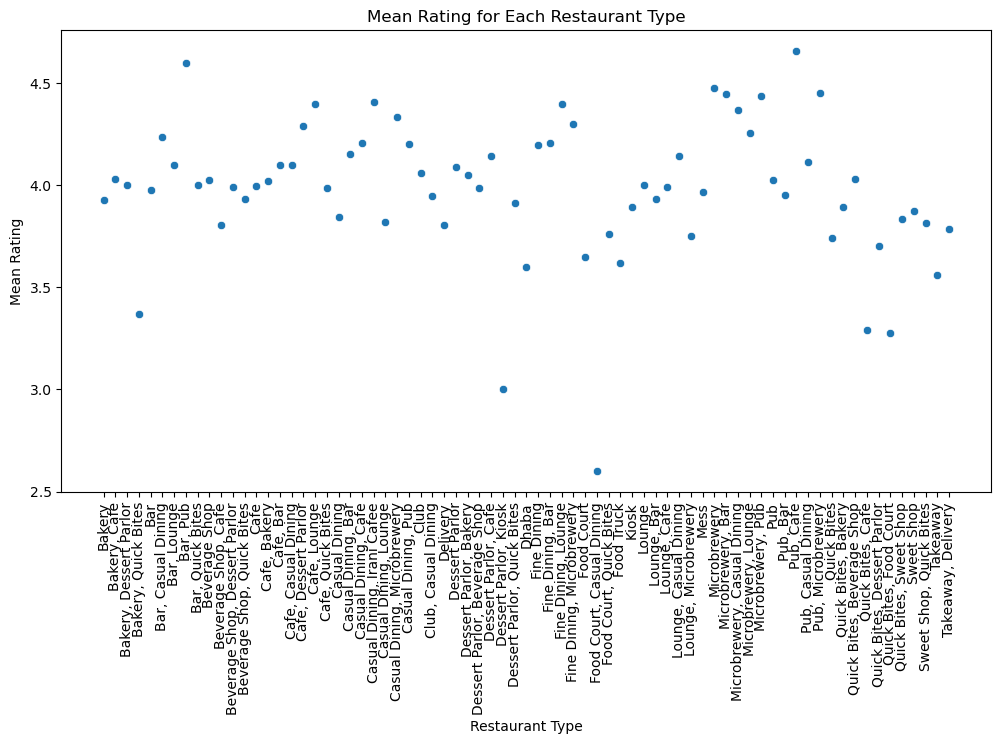

In [86]:
# Calculate the mean rating for each restaurant type
mean_ratings = df.groupby('rest_type')['rate'].mean().reset_index()

# Create a scatter plot with mean ratings
plt.figure(figsize=(12, 6))
sns.scatterplot(x='rest_type', y='rate', data=mean_ratings)
plt.xticks(rotation=90)
plt.title('Mean Rating for Each Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Mean Rating')
plt.show()

## Average cost for two person

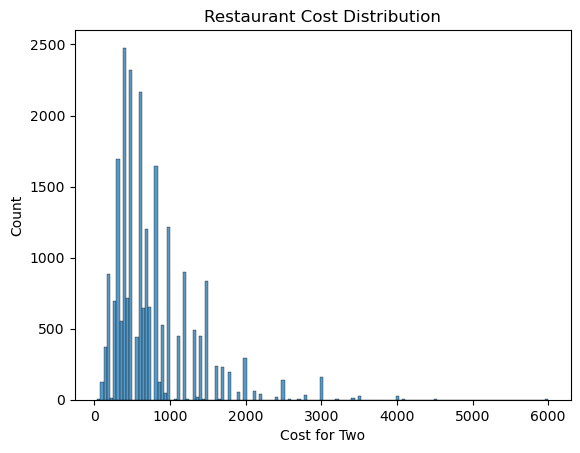

In [90]:
# 10. Cost of Restaurant (Histogram)
sns.histplot(data=df, x='avg_cost')
plt.xlabel('Cost for Two')
plt.ylabel('Count')
plt.title('Restaurant Cost Distribution')
plt.show()

## Top 10 dished_liked in Bangalore

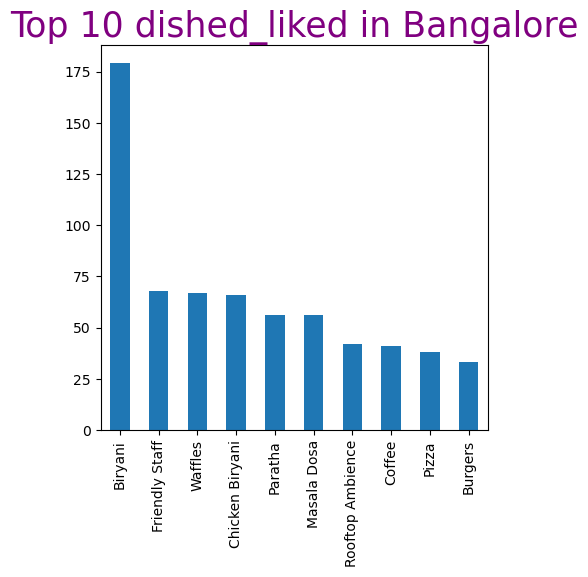

In [45]:
plt.figure(figsize=(5,5))
ax=df['dish_liked'].value_counts()[:10]
ax.plot(kind='bar')
plt.title("Top 10 dished_liked in Bangalore",fontsize=25,color='purple')
plt.show()


- We can see that Biryani is most favorite in bangalore

## Top 10 Cuisine

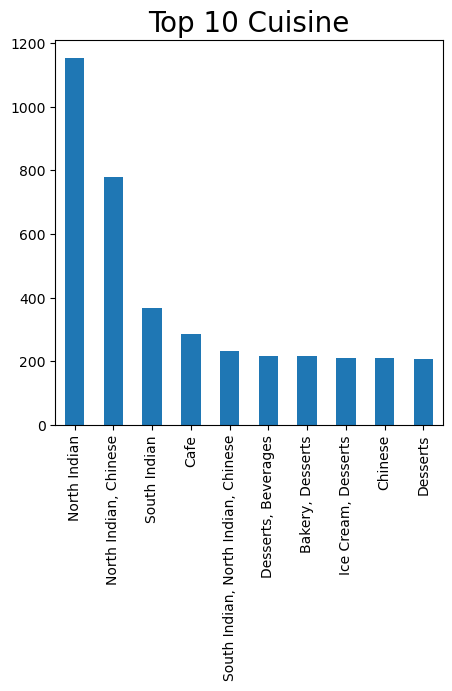

In [47]:
plt.figure(figsize=(5,5))

ax=df.cuisines.value_counts()[:10]
ax.plot(kind='bar')

plt.title("Top 10 Cuisine",fontsize=20)
plt.xticks(fontsize=10)
plt.show()

## Most Famous Restaurant Chains in Bengaluru

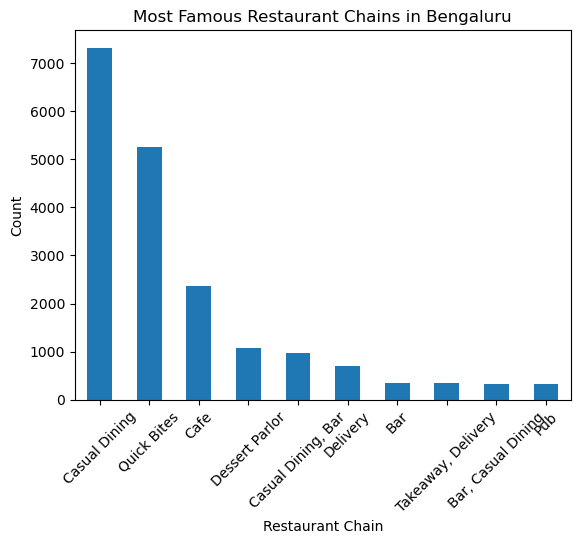

In [91]:
# 12. Most Famous Restaurant Chains in Bengaluru (Bar Chart)
famous_chains = df['rest_type'].value_counts().head(10)
famous_chains.plot(kind='bar')
plt.xlabel('Restaurant Chain')
plt.ylabel('Count')
plt.title('Most Famous Restaurant Chains in Bengaluru')
plt.xticks(rotation=45)
plt.show()

# Data transformation

lets Convert categorical data into numerical data using LabelEncoding.
Now we drop unwanted Columns

In [36]:
df=df.drop(['dish_liked','meal_type'],axis=1)

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [38]:
list1=['online_order','book_table','rest_type','cuisines','city']
for i in list1:
    df[i]=le.fit_transform(df[i])

df.head()

,online_order,book_table,rate,votes,rest_type,cuisines,avg_cost,city
0,1,1,4.1/5,775,20,1386,800,1
1,1,0,4.1/5,787,20,594,800,1
2,1,0,3.8/5,918,16,484,800,1
3,0,0,3.7/5,88,62,1587,300,1
4,0,0,3.8/5,166,20,1406,600,1


- As you can see out data is Label Encoded

# Feature Selection and Feature Scaling

## Select the feature and Label(target) from the data

In [39]:
df.shape

(23218, 8)

In [40]:
#Drop null values
df.dropna(how='any',inplace=True)
df.shape

(23218, 8)

In [78]:
# selecing features
features=df.drop(['rate'],axis=1)
features.shape

(23218, 8)

In [79]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [80]:
features.dtypes

online_order      int32
book_table        int32
votes             int32
rest_type         int32
cuisines          int32
avg_cost          int32
city              int32
target          float64
dtype: object

In [81]:
# selecting Class/ Label
label=df['rate'].values
label

array(['4.1', '4.1', '3.8', ..., '2.8 ', '2.5 ', '4.3 '], dtype=object)

# Feature Scaling

In [82]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [83]:
features=StandardScaler().fit(features).transform(features)
features

array([[ 0.64765226,  1.68699436,  0.15341614, ...,  0.09049271,
        -1.63320021,  0.45679337],
       [ 0.64765226, -0.59277021,  0.16420077, ...,  0.09049271,
        -1.63320021,  0.45679337],
       [ 0.64765226, -0.59277021,  0.28193301, ...,  0.09049271,
        -1.63320021, -0.24725791],
       ...,
       [-1.54403847, -0.59277021, -0.39839757, ...,  0.85950607,
         1.79700039, -2.59409553],
       [-1.54403847, -0.59277021, -0.47029512, ...,  0.09049271,
         1.79700039, -3.29814682],
       [-1.54403847,  1.68699436, -0.33099361, ...,  3.35879947,
         1.79700039,  0.9261609 ]])

# Split the data

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,label,test_size=0.10,random_state=42)

In [85]:
# Check the shape of splited data
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((20896, 8), (2322, 8), (20896,), (2322,))

# Apply Regressions Models

## Linear Regression

In [89]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg
lin_reg.fit(X_train,y_train)
print(lin_reg.score(X_train,y_train))
print(lin_reg.score(X_test,y_test))

1.0
1.0


## New Predict

In [91]:
lin_reg_pred=lin_reg.predict(X_test)

In [92]:
from sklearn.metrics import r2_score
lin_reg_score=r2_score(y_test,lin_reg_pred)*100
print("Accuracy score for LR :",lin_reg_score)

Accuracy score for LR : 100.0


# Ridge Regression

In [97]:
from sklearn.linear_model import Ridge
rr=Ridge()
rr
rr.fit(X_train,y_train)
print(rr.score(X_train,y_train))
print(rr.score(X_test,y_test))

0.9999999970752619
0.9999999970686904


## New Predict

In [98]:
rr_pred=rr.predict(X_test)

In [99]:
from sklearn.metrics import r2_score
rr_score=r2_score(y_test,rr_pred)*100
print("Accuracy score for RidgeR :",rr_score)

Accuracy score for RidgeR : 99.99999970686903


# Random Forest Regressor

In [102]:
rfr=RandomForestRegressor()
rfr
rfr.fit(X_train,y_train)
print(rfr.score(X_train,y_train))
print(rfr.score(X_test,y_test))

0.9999993147956391
0.9999999975565861


## New Predict

In [103]:
rfr_pred=rfr.predict(X_test)

In [104]:
from sklearn.metrics import r2_score

rfr_score=r2_score(y_test,rfr_pred)*100
print("Accuracy score for LR :",rfr_score)

Accuracy score for LR : 99.9999997556586


# Support Vector Regression

In [107]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,y_train)
print(svr.score(X_train,y_train))
print(svr.score(X_test,y_test))

0.9895250742188835
0.9886527849807227


## New Predict

In [108]:
svr_pred=svr.predict(X_test)

In [109]:
from sklearn.metrics import r2_score

svr_score=r2_score(y_test,svr_pred)*100
print("Accuracy score for LR :",svr_score)

Accuracy score for LR : 98.86527849807227


In [110]:
pd.DataFrame({"Model Names":['Linear Reg','Ridge Reg','RandomForest Reg','Support Vector Reg'],
            "Accuracy socre":[lin_reg_score,rr_score,rfr_score,svr_score]})

,Model Names,Accuracy socre
0,Linear Reg,100.000000
1,Ridge Reg,100.000000
2,RandomForest Reg,100.000000
3,Support Vector Reg,98.865278


- As you can see from above data "LinearRegression","Ridge Regression","Random Forest Regressor" Given the highest Accuacry score

## PREDICT THE RATING with Random Forest Regressor Model

In [112]:
rfr.predict([[1,0,13,73,1900,350,27,88]])

array([4.9])

- We got 4.4 Rating for out first predict over model

## Compare Actual rating with Random Forest Regressor new Predicted Rating

In [113]:
sample=pd.DataFrame({"Actual Ratin":y_test,
             "Predicted Rating":np.round(rfr_pred,2)})
sample

,Actual Ratin,Predicted Rating
0,3.8,3.8
1,4.1,4.1
2,3.7,3.7
3,2.9,2.9
4,4.1,4.1
...,...,...
2317,3.6,3.6
2318,3.9,3.9
2319,3.9,3.9
2320,3.0,3.0


- AS you can see Our model is working very good its predicted Ratings are equal to the Actual Ratings